+ country - страна-производитель вина
+ description - подробное описание
+ designation - название виноградника, где выращивают виноград для вина
+ points - количество баллов, которое WineEnthusiast оценил вино по шкале от 1 до 100
+ price - стоимость бутылки вина
+ province - провинция или штат 
+ region_1 - винодельческий район в провинции или штате (например, Напа)
+ region_2 - конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но это значение иногда может быть пустым.
+ taster_name - имя дегустатора
+ taster_twitter_handle - твиттер дегустатора
+ title - название вина, который часто содержит годи др подробную информацию
+ variety -  сорт винограда, из которого изготовлено вино (например, Пино Нуар).
+ winery - винодельня, которая производила вино

In [1]:
import pandas as pd
import seaborn as sns

from ydata_profiling import ProfileReport

/Users/dmitry.repnikov/Documents/Python/SFProjects/sf_data_science/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data = pd.read_csv('data/wine.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [4]:
data.describe()

points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000

In [5]:
print(data['taster_name'].nunique())

19


In [6]:
# находим дубликаты
dupl_columns = list(data.columns)

mask = data.duplicated(subset=dupl_columns)
wines_duplicates = data[mask]
print(f'Число найденных дубликатов: {wines_duplicates.shape[0]}')

Число найденных дубликатов: 9983


In [7]:
# Удаляем дубликаты 

data_dedupped = data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {data_dedupped.shape[0]}')

Результирующее число записей: 119988


In [8]:
data_dedupped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


In [9]:
cols_null_percent = data_dedupped.isnull().mean() * 100
# получаем признаки с пропусками более 30%
cols_with_null = cols_null_percent[cols_null_percent>30].sort_values(ascending=False)
display(cols_with_null)
# удаляем эти признаки
data_dedupped.drop(cols_with_null.keys(), axis= 1 , inplace= True ) 
data_dedupped.info()


region_2    61.021936
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   taster_name            95071 non-null   object 
 8   taster_twitter_handle  90542 non-null   object 
 9   title                  119988 non-null  object 
 10  variety                119987 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


/var/folders/9t/d4bq7zb146v439lxxk1zxns00000gq/T/ipykernel_54718/2421318648.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dedupped.drop(cols_with_null.keys(), axis= 1 , inplace= True )


In [10]:
#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'country': 'US',
    'designation': 'unknown',
    'price': data_dedupped['price'].mean(),
    'province': 'California',
    'region_1': 'unknown',
    'taster_name': 'unknown',
    'taster_twitter_handle': 'unknown',
    'variety': 'Pinot Noir'
}
#заполняем оставшиеся записи константами в соответствии со словарем values
data = data_dedupped.fillna(values)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119988 non-null  object 
 1   description            119988 non-null  object 
 2   designation            119988 non-null  object 
 3   points                 119988 non-null  int64  
 4   price                  119988 non-null  float64
 5   province               119988 non-null  object 
 6   region_1               119988 non-null  object 
 7   taster_name            119988 non-null  object 
 8   taster_twitter_handle  119988 non-null  object 
 9   title                  119988 non-null  object 
 10  variety                119988 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


<Axes: >

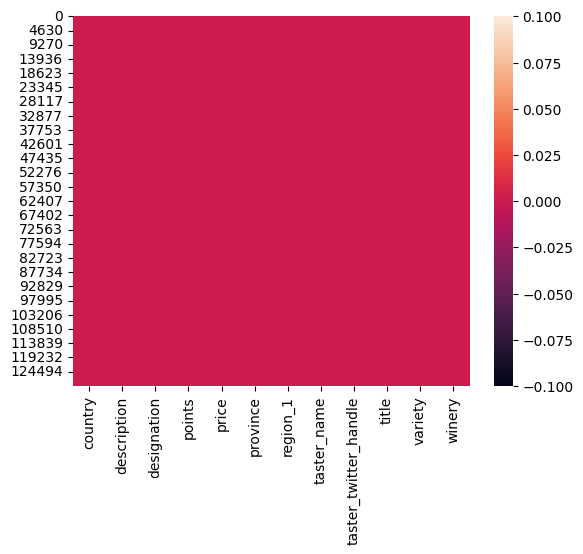

In [12]:
sns.heatmap(data.isnull()) # убеждаемся, что датасет без пропусков

In [13]:
data = data.to_csv('data/wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы

In [14]:
df = pd.read_csv('data/wine.csv')

In [15]:
profile = ProfileReport(df, title="Pandas Profiling Report")

profile.to_file("data/wine_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/dmitry.repnikov/Documents/Python/SFProjects/sf_data_science/.venv/lib/python3.9/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Italy'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]